# Historical Stock Price Returns

# Import Data

**Historical Price Data**
- We can provide up to 20 years end of day stock price history for all of the exchanges we support. Intraday data (1, 5, 10, 15, 30 and 60 minute bars) is available back to Jan 1, 2008. All of our end of day historical stock prices have been cleaned for spikes and other anomalies and adjusted for splits.
https://www.eoddata.com/products/historicaldata.aspx

In [174]:
import pandas as pd
import numpy as np
import matplotlib as mpb
import matplotlib.pyplot as plt

import itertools

In [175]:
directory = '/Users/rrunchey/SynologyDrive/Documents/Finance/Analysis/Historical Stock Data'

date_range = '_2001_to_2022_number_of_days_425'
exchange = 'OTCBB' #['AMEX', 'NASDAQ', 'NYSE', 'OTCBB']
df = pd.read_pickle('returns_output_' + exchange + date_range + '.pkl')

In [176]:
df.head()

,symbol,date,close,number_of_days,date_end,close_end,price_difference,gain
0,AABB.OB,2006-06-16,0.10,850,2008-10-13,0.0045,-0.0955,-0.955
1,AABB.OB,2006-06-19,0.10,850,2008-10-16,0.0045,-0.0955,-0.955
2,AABB.OB,2006-06-20,0.06,850,2008-10-17,0.0045,-0.0555,-0.925
3,AABB.OB,2006-06-21,0.06,850,2008-10-18,NaN,NaN,NaN
4,AABB.OB,2006-06-22,0.06,850,2008-10-19,NaN,NaN,NaN


# Charts

In [177]:
def gains_limit(x):
    if x > 1:
        return 1.1
    else:
        return x

## Example Histogram

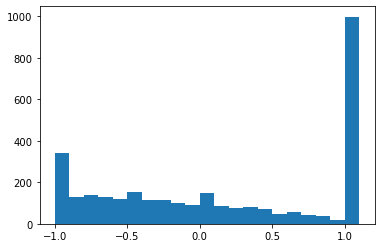

In [178]:
# example histogram
mask = (df['date'] == '2018-09-14') & (df['close'] <= 3)
x = df[mask]['gain'].map(gains_limit)

# account for stock tickers that don't have a close_end price. tbd the root cause: merger, bankruptcy, delisting, etc.
# conservative approach: treat as if they all were a complete loss meaning the stock price went to $0
x[np.isnan(x)] = -1

plt.hist(x, bins=21, range=(-1, 1.1));

In [179]:
data = np.histogram(x, bins=21, range=(-1, 1.1))

d = {'bins': data[1], 'counts': np.append(data[0], np.nan)}
df_hist = pd.DataFrame(data=d)
df_hist['cum_sum'] = df_hist.sort_values('bins', ascending=False).counts.cumsum()
df_hist['pct_cum_sum'] = df_hist['cum_sum'] / df_hist['counts'].sum()
df_hist

,bins,counts,cum_sum,pct_cum_sum
0,-1.0,341.0,3092.0,1.000000
1,-0.9,129.0,2751.0,0.889715
2,-0.8,141.0,2622.0,0.847995
3,-0.7,131.0,2481.0,0.802393
4,-0.6,118.0,2350.0,0.760026
5,-0.5,154.0,2232.0,0.721863
6,-0.4,116.0,2078.0,0.672057
7,-0.3,115.0,1962.0,0.634541
8,-0.2,99.0,1847.0,0.597348
9,-0.1,90.0,1748.0,0.565330


### Histogram Charts

In [180]:
list_dates = ['2002-09-16', '2003-09-15', '2004-09-14', '2005-09-16', '2006-09-15', '2007-09-14', '2008-09-15', \
              '2009-09-14', '2010-09-14', '2011-09-16', '2012-09-14', '2013-09-16', '2014-09-15', '2015-09-14', \
              '2016-09-16', '2017-09-15', '2018-09-14', '2019-09-14']

df_list = []

for date in list_dates:
    mask = (df['date'] == date) & (df['close'] <= 3)
    x = df[mask]['gain'].map(gains_limit)

    # account for stock tickers that don't have a close_end price. tbd the root cause: merger, bankruptcy, delisting, etc.
    # conservative approach: treat as if they all were a complete loss meaning the stock price went to $0
    if len(x) == 0:
        x = np.array(0)
    x[np.isnan(x)] = -1

    data = np.histogram(x, bins=21, range=(-1, 1.1))

    d = {'date': list(itertools.repeat(date, 22)), 'bins': data[1], 'counts': np.append(data[0], np.nan)}
    df_hist = pd.DataFrame(data=d)
    df_hist['cum_sum'] = df_hist.sort_values('bins', ascending=False).counts.cumsum()
    df_hist['pct_cum_sum'] = df_hist['cum_sum'] / df_hist['counts'].sum()
    
    df_list.append(df_hist)

df_histograms = pd.concat(df_list)
df_histograms.head()

,date,bins,counts,cum_sum,pct_cum_sum
0,2002-09-16,-1.0,24.0,183.0,1.000000
1,2002-09-16,-0.9,12.0,159.0,0.868852
2,2002-09-16,-0.8,7.0,147.0,0.803279
3,2002-09-16,-0.7,6.0,140.0,0.765027
4,2002-09-16,-0.6,8.0,134.0,0.732240


In [181]:
df_histograms.to_csv('df_histograms_less_than_3_' + exchange + date_range + '.csv')
df_histograms.to_pickle('df_histograms_less_than_3_' + exchange + date_range + '.pkl')

In [182]:
# sample size per year
df_histograms.groupby(['date']).agg({'counts': 'sum'})

,counts
date,
2002-09-16,183.0
2003-09-15,190.0
2004-09-14,519.0
2005-09-16,808.0
2006-09-15,943.0
2007-09-14,1248.0
2008-09-15,1280.0
2009-09-14,1399.0
2010-09-14,1551.0


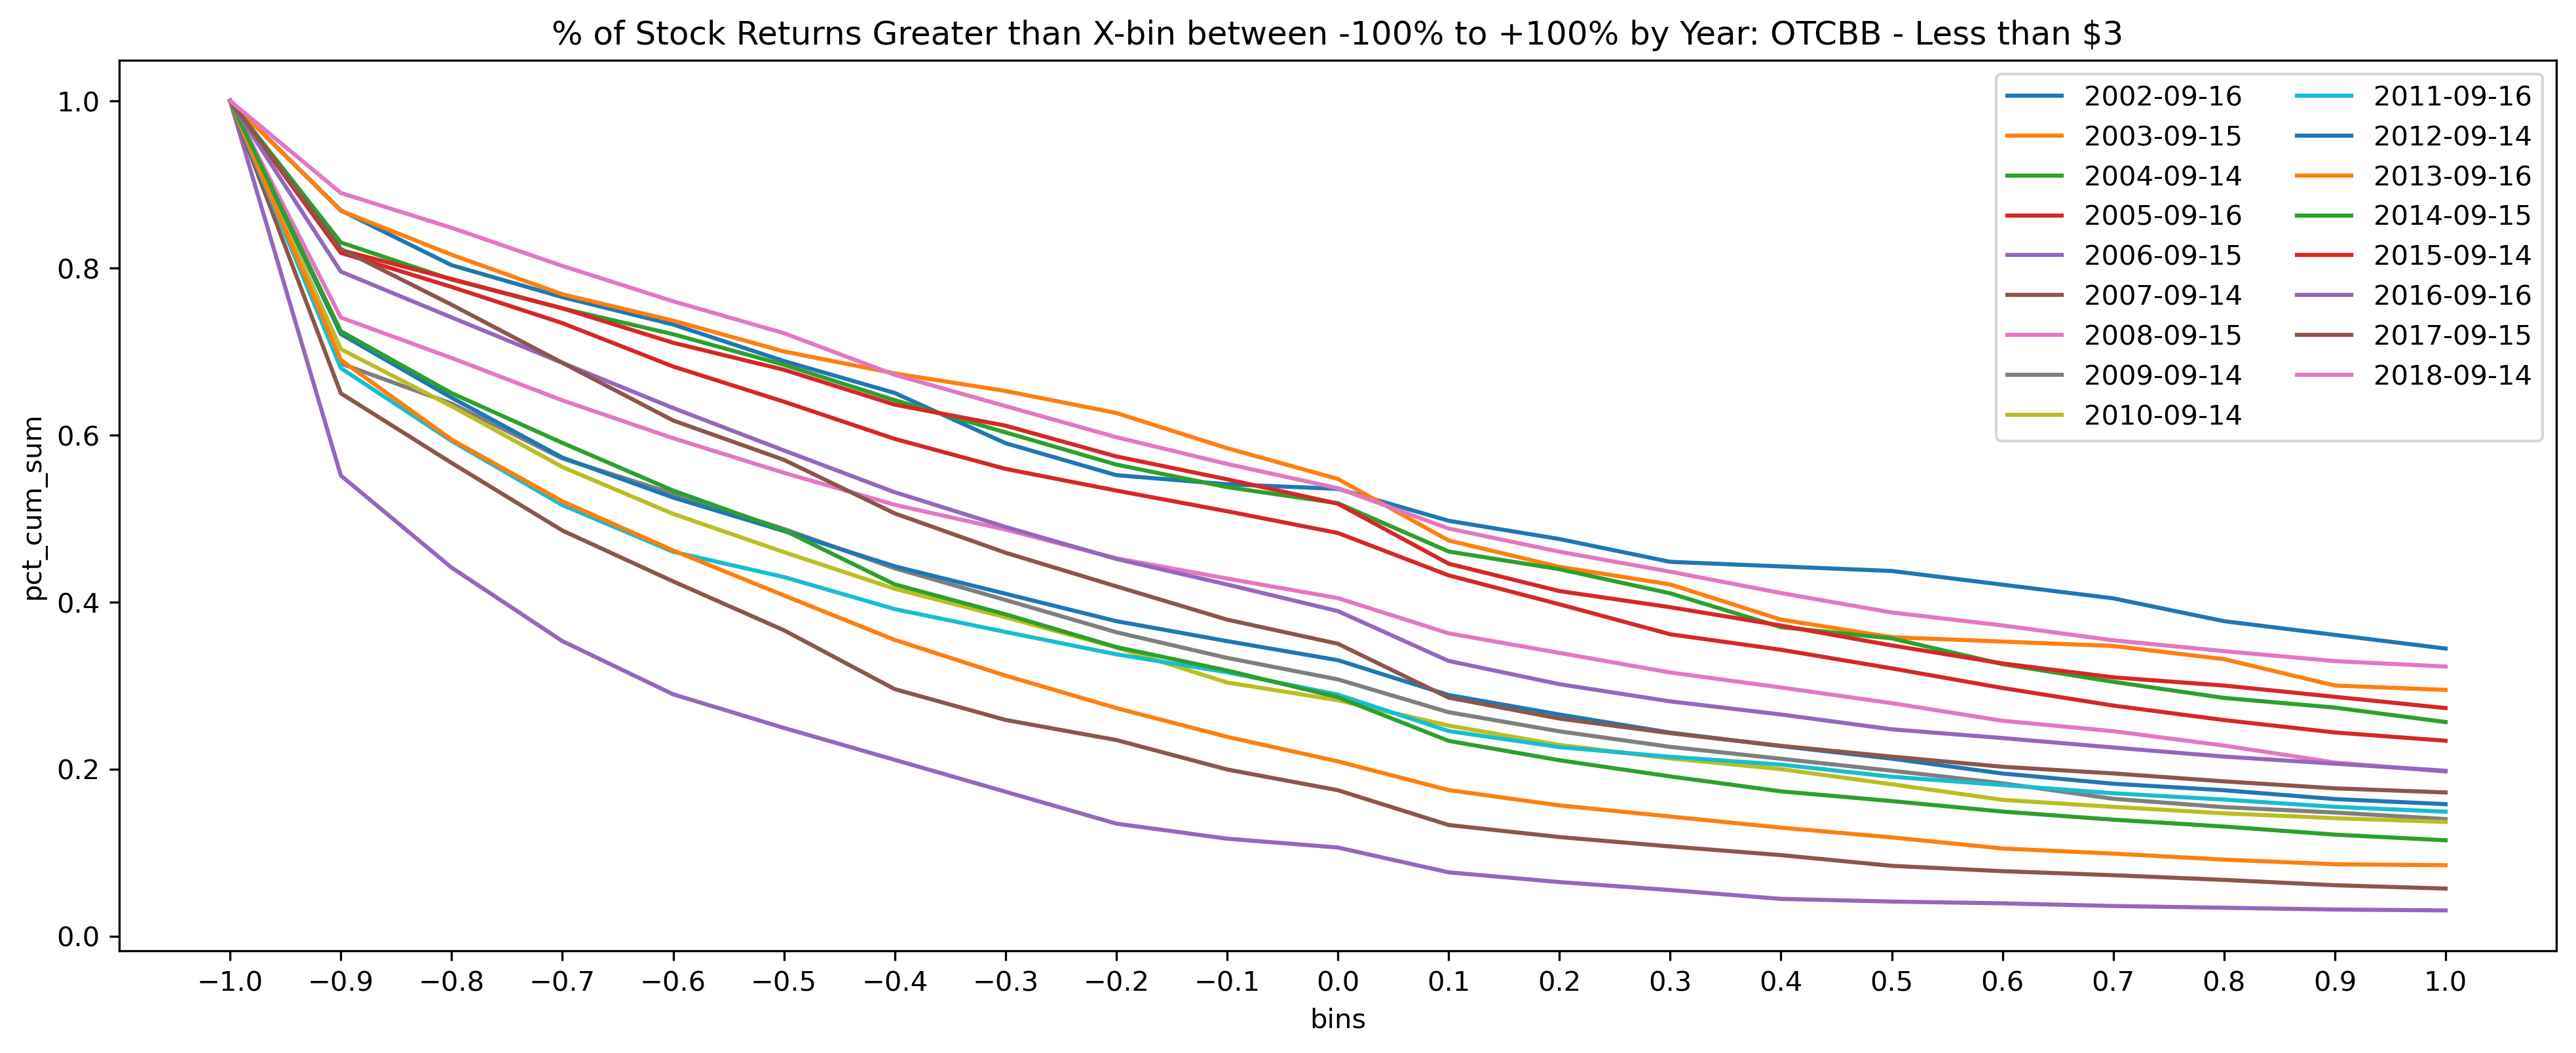

In [183]:
plt.figure(figsize=(16, 6), dpi=300);
for d in list_dates:
    mask = (df_histograms['date'] == d)
    plt.plot('bins', 'pct_cum_sum', data=df_histograms[mask], label=d);

plt.title('% of Stock Returns Greater than X-bin between -100% to +100% by Year: ' + exchange + ' - Less than $3')
plt.ylabel('pct_cum_sum')
plt.xlabel('bins')
plt.xticks(ticks=[i/10 for i in range(-10, 11, 1)])
plt.legend(ncol=2, loc='upper right')

plt.savefig('chart_histograms_less_than_3_' + exchange + date_range + '.png', dpi='figure', bbox_inches=None, pad_inches=0.1,
            facecolor='auto', edgecolor='auto');

## Aggregate of Histograms

In [184]:
df_histograms_agg = df_histograms.groupby(['bins']).agg({'counts': ['min', 'max', 'mean', 'median'], \
                                                         'pct_cum_sum': ['min', 'max', 'mean', 'median']})
df_histograms_agg

counts                           pct_cum_sum                      \
        min    max        mean median         min       max      mean   
bins                                                                    
-1.0   24.0  570.0  368.882353  437.0    1.000000  1.000000  1.000000   
-0.9   10.0  176.0   97.117647  104.0    0.551432  0.889715  0.756468   
-0.8    7.0  183.0   92.764706  101.0    0.441145  0.847995  0.692199   
-0.7    6.0  182.0   79.705882   86.0    0.353128  0.802393  0.632883   
-0.6    7.0  126.0   65.941176   71.0    0.289502  0.760026  0.583371   
-0.5    5.0  169.0   75.823529   68.0    0.249205  0.721863  0.540587   
-0.4    4.0  124.0   55.647059   53.0    0.211029  0.673684  0.493879   
-0.3    5.0  115.0   54.529412   54.0    0.172853  0.652632  0.457271   
-0.2    2.0  105.0   46.176471   43.0    0.134677  0.626316  0.422531   
-0.1    1.0   90.0   40.882353   36.0    0.116649  0.584211  0.393546   
 0.0    7.0  170.0   75.000000   55.0    0.106045  0.547368  0.368642   
 0.1    4.0   86.0   36.823529   33.0    0.076352  0.497268  0.320411   
 0.2    4.0   74.0   29.058824   26.0    0.064687  0.475410  0.296736   
 0.3    1.0   79.0   26.117647   21.0    0.055143  0.448087  0.276775   
 0.4    1.0   72.0   24.764706   24.0    0.044539  0.442623  0.258663   
 0.5    1.0   48.0   22.294118   24.0    0.041357  0.437158  0.243372   
 0.6    1.0   55.0   18.058824   17.0    0.039236  0.420765  0.228511   
 0.7    2.0   40.0   15.294118   14.0    0.036055  0.404372  0.216574   
 0.8    2.0   37.0   15.000000   12.0    0.033934  0.377049  0.205024   
 0.9    1.0   30.0   10.588235   10.0    0.031813  0.360656  0.193716   
 1.0   29.0  998.0  275.352941  212.0    0.030753  0.344262  0.186042   
 1.1    NaN    NaN         NaN    NaN         NaN       NaN       NaN   

                
        median  
bins            
-1.0  1.000000  
-0.9  0.740625  
-0.8  0.692187  
-0.7  0.641406  
-0.6  0.596094  
-0.5  0.554688  
-0.4  0.506074  
-0.3  0.458998  
-0.2  0.418755  
-0.1  0.378891  
 0.0  0.350038  
 0.1  0.288654  
 0.2  0.265295  
 0.3  0.243604  
 0.4  0.227790  
 0.5  0.214882  
 0.6  0.202733  
 0.7  0.194761  
 0.8  0.185270  
 0.9  0.176917  
 1.0  0.171982  
 1.1       NaN

In [185]:
df_histograms_agg.to_csv('df_histograms_agg_less_than_3_' + exchange + date_range + '.csv')